In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
X, y = load_diabetes(return_X_y=True)

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [5]:
X_train.shape

(331, 10)

In [6]:
class MyGradienBoost:
    
    def __init__(self, n_trees = 10, max_depth = 2, alpha = 0.1, l2 = True):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.alpha = alpha
        self.trees = []
        self.coefs = [1] * self.n_trees
        self.loss = self.bias_l2 if l2 else self.bias_l1
        self.test_errors = []
        self.train_errors = []
    
    def predict(self, data):
        return np.array([sum([self.alpha * coef * alg.predict([row])[0] for alg, coef in zip(self.trees, self.coefs)]) for row in data])
    
    def mse(self, y_real, prediction):
        return (sum((y_real - prediction)**2)) / len(y_real)
    
    def bias_l1(self, y, z):
        return np.sign(y - z)
    
    def bias_l2(self, y, z):
        return (y - z)
    
    def fit(self, X_train, X_test, y_train, y_test):
        
        for i in range(self.n_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            
            if len(self.trees) == 0:
                tree.fit(X_train, y_train)
            
                self.train_errors.append(self.mse(y_train, self.predict(X_train)))
                self.test_errors.append(self.mse(y_test, self.predict(X_test)))
            else:
                target = self.predict(X_train)
                
                tree.fit(X_train, self.loss(y_train, target))
            
                self.train_errors.append(self.mse(y_train, self.predict(X_train)))
                self.test_errors.append(self.mse(y_test, self.predict(X_test)))

            self.trees.append(tree)
    
    

In [7]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [8]:
def evaluate_alg(gb, X_train, X_test, y_train, y_test):
    gb.fit(X_train, X_test, y_train, y_test)
    train_prediction = gb.predict(X_train)

    print(f'Ошибка алгоритма из {gb.n_trees} деревьев глубиной {gb.max_depth} \
    с шагом {gb.alpha} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb.predict(X_test)

    print(f'Ошибка алгоритма из {gb.n_trees} деревьев глубиной {gb.max_depth} \
    с шагом {gb.alpha} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [9]:
gb = MyGradienBoost(n_trees = 20, max_depth = 5, alpha = 0.25, l2 = True)

In [10]:
evaluate_alg(gb, X_train, X_test, y_train, y_test)

Ошибка алгоритма из 20 деревьев глубиной 5     с шагом 0.25 на тренировочной выборке: 253.41964567518693
Ошибка алгоритма из 20 деревьев глубиной 5     с шагом 0.25 на тестовой выборке: 3638.954677776505


In [11]:
import matplotlib.pyplot as plt

In [12]:
def get_error_plot(model):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, model.n_trees)
    plt.plot(list(range(model.n_trees)), model.train_errors, label='train error')
    plt.plot(list(range(model.n_trees)), model.test_errors, label='test error')
    plt.legend(loc='upper right')
    plt.show()

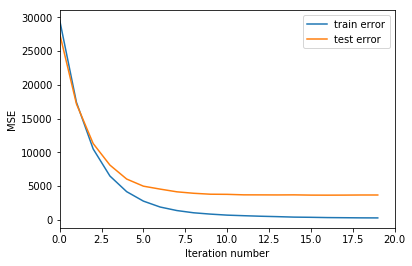

In [13]:
get_error_plot(gb)

Ошибка алгоритма из 30 деревьев глубиной 1     с шагом 0.5 на тренировочной выборке: 2297.9476717915345
Ошибка алгоритма из 30 деревьев глубиной 1     с шагом 0.5 на тестовой выборке: 3248.3272491453004


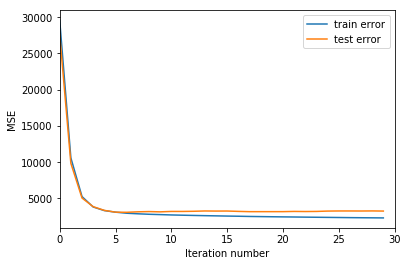

In [14]:
gb = MyGradienBoost(n_trees = 30, max_depth = 1, alpha = 0.5, l2 = True)
evaluate_alg(gb, X_train, X_test, y_train, y_test)
get_error_plot(gb)

#### Реализуем наш класс без подсчета внутренних ошибок

In [15]:
class MyGradienBoostFast:
    
    def __init__(self, n_trees = 10, max_depth = 2, alpha = 0.1, l2 = True):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.alpha = alpha
        self.trees = []
        self.coefs = [1] * self.n_trees
        self.loss = self.bias_l2 if l2 else self.bias_l1
    
    def predict(self, data):
        return np.array([sum([self.alpha * coef * alg.predict([row])[0] for alg, coef in zip(self.trees, self.coefs)]) for row in data])
 
    def bias_l1(self, y, z):
        return np.sign(y - z)
    
    def bias_l2(self, y, z):
        return (y - z)
    
    def fit(self, X_train, y_train):
        
        for i in range(self.n_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            
            if len(self.trees) == 0:
                tree.fit(X_train, y_train)
            else:
                target = self.predict(X_train)
                
                tree.fit(X_train, self.loss(y_train, target))

            self.trees.append(tree)
    

In [16]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

In [17]:
def calc_error(model, X_test, y_test):
    y_pred = model.predict(X_test)
    err = mean_squared_error(y_test, y_pred)
    return err

In [18]:
calc_error(gb, X_test, y_test)

3248.3272491453004

In [19]:
n_trees = np.linspace(30, 50, 20).astype(int)
max_depth = np.linspace(1, 10, 5).astype(int)


z = np.zeros((len(n_trees), len(max_depth)))

for i, _n_trees in enumerate(n_trees):
    for j, depth in enumerate(max_depth):
        model = MyGradienBoostFast(n_trees = _n_trees, max_depth = depth)
        model.fit(X_train, y_train)
        err = calc_error(model, X_test, y_test)
        z[i, j] = err
        print(f'Model with {_n_trees} trees and {depth} max_depth error: {err}')

Model with 30 trees and 1 max_depth error: 3181.2066608436276
Model with 30 trees and 3 max_depth error: 3303.703430093239
Model with 30 trees and 5 max_depth error: 3842.522903342527
Model with 30 trees and 7 max_depth error: 4203.812085453943
Model with 30 trees and 10 max_depth error: 4810.63998844046
Model with 31 trees and 1 max_depth error: 3152.0168787538596
Model with 31 trees and 3 max_depth error: 3279.672060202282
Model with 31 trees and 5 max_depth error: 3773.632482116048
Model with 31 trees and 7 max_depth error: 4163.274028102421
Model with 31 trees and 10 max_depth error: 4779.192315276838
Model with 32 trees and 1 max_depth error: 3117.320005029701
Model with 32 trees and 3 max_depth error: 3293.920292967591
Model with 32 trees and 5 max_depth error: 3848.121148335995
Model with 32 trees and 7 max_depth error: 4168.80221409141
Model with 32 trees and 10 max_depth error: 4704.299966971098
Model with 33 trees and 1 max_depth error: 3085.3509517838015
Model with 33 trees 

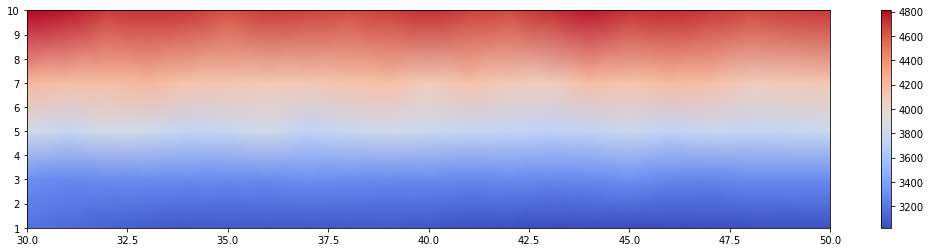

In [20]:
levels = MaxNLocator(nbins=50).tick_values(z.min(), z.max())
cmap = plt.get_cmap('coolwarm')
plt.figure(figsize=(18,4))
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
plt.pcolormesh(n_trees, max_depth, z.T, cmap=cmap, shading='gouraud')
plt.colorbar()
plt.show()

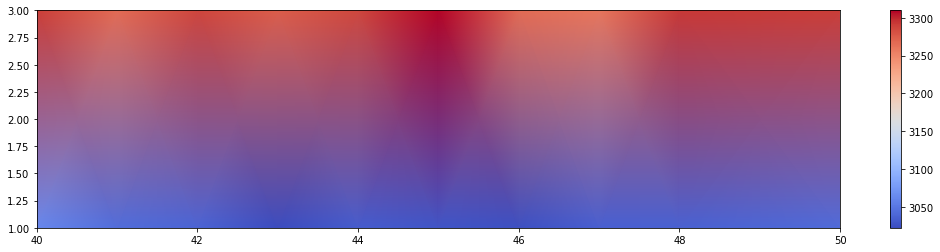

In [61]:
levels = MaxNLocator(nbins=50).tick_values(z[10:,:2].min(), z[10:,:2].max())
cmap = plt.get_cmap('coolwarm')
plt.figure(figsize=(18,4))
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
plt.pcolormesh(n_trees[10:], max_depth[:2], z.T[:2,10:], cmap=cmap, shading='gouraud')
plt.colorbar()
plt.show()

[]

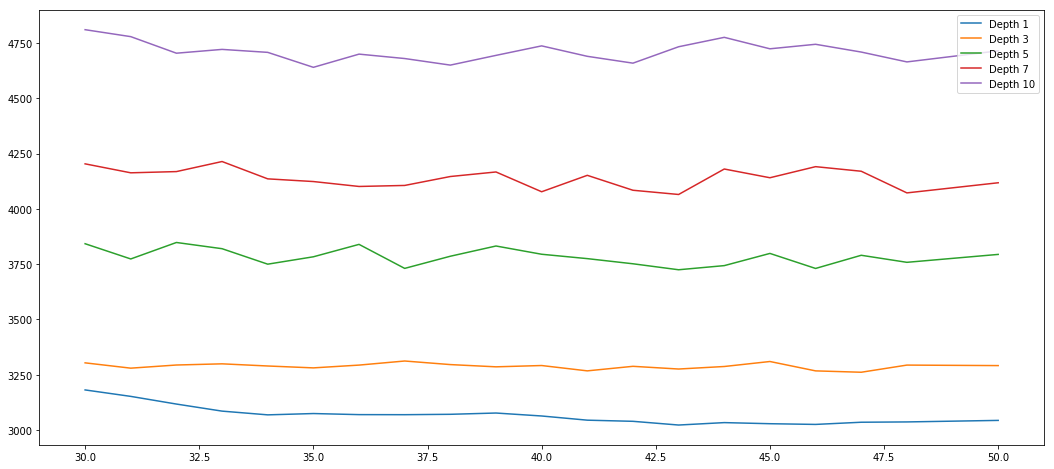

In [21]:
plt.figure(figsize=(18,8))
for i, depth in enumerate(max_depth):
    plt.plot(n_trees, list([row[i] for row in z]), label=f'Depth {depth}')
plt.legend()
plt.plot()

#### Как видим выше, при большей глубине деревьев наш алгоритм имеет тенденцию к переобучению на тренировочных данных (но все не так однозначно, и сильно зависит от самих данных)
#### Увеличение числа итераций тоже приводит к переобучению, но тут можно уменьшить скорость обучения 

In [69]:
class MyGradienBoostStochatic:
    
    def __init__(self, n_trees = 10, max_depth = 2, alpha = 0.1, batch_size = 0.1, l2 = True):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.alpha = alpha
        self.batch_size = batch_size
        self.trees = []
        self.coefs = [1] * self.n_trees
        self.loss = self.bias_l2 if l2 else self.bias_l1
        self.test_errors = []
        self.train_errors = []
    
    def predict(self, data):
        return np.array([sum([self.alpha * coef * alg.predict([row])[0] for alg, coef in zip(self.trees, self.coefs)]) for row in data])
 
    def bias_l1(self, y, z):
        return np.sign(y - z)
    
    def bias_l2(self, y, z):
        return (y - z)
    
    def mse(self, y_real, prediction):
        return (sum((y_real - prediction)**2)) / len(y_real)
    
    def fit(self, X_train, X_test, y_train, y_test):
        
        i = 0
        
        n = X_train.shape[0]
        qty_in_batch = np.round(n * self.batch_size).astype(int)
        n_batch = n // qty_in_batch
        
        #if n % qty_in_batch != 0:
        #    n_batch += 1
        
        while i < self.n_trees:
            for b in range(n_batch):
                
                if b == n_batch - 1:
                    start_ = qty_in_batch * b
                    X_tmp = X_train[start_ :, :]
                    y_tmp = y_train[start_ :]
                else:
                    start_ = qty_in_batch * b
                    end_ = qty_in_batch * (b + 1)
                    X_tmp = X_train[start_ : end_, :]
                    y_tmp = y_train[start_ : end_]
                
                tree = DecisionTreeRegressor(max_depth=self.max_depth)
            
                if len(self.trees) == 0:
                    tree.fit(X_tmp, y_tmp)
                    
                    self.train_errors.append(self.mse(y_train, self.predict(X_train)))
                    self.test_errors.append(self.mse(y_test, self.predict(X_test)))
                else:
                    target = self.predict(X_tmp)
                
                    tree.fit(X_tmp, self.loss(y_tmp, target))
                    
                    self.train_errors.append(self.mse(y_train, self.predict(X_train)))
                    self.test_errors.append(self.mse(y_test, self.predict(X_test)))

                self.trees.append(tree)
                
                i += 1
                if i >= self.n_trees:
                    break

In [70]:
model = MyGradienBoostStochatic(n_trees = 40, max_depth = 2, alpha = 0.05, batch_size = 0.25)
model.fit(X_train, X_test, y_train, y_test)
err = calc_error(model, X_test, y_test)
err

3458.4740761733647

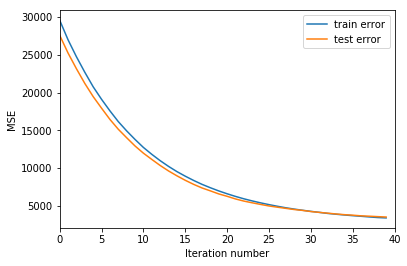

In [71]:
get_error_plot(model)

In [72]:
model = MyGradienBoost(n_trees = 40, max_depth = 2, alpha = 0.05)
model.fit(X_train, X_test, y_train, y_test)
err = calc_error(model, X_test, y_test)
err

3422.752872365666

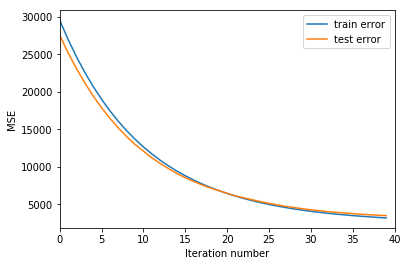

In [73]:
get_error_plot(model)

In [74]:
model_1 = MyGradienBoostStochatic(n_trees = 25, max_depth = 1, alpha = 0.1, batch_size = 0.5)
model_1.fit(X_train, X_test, y_train, y_test)
model_2 = MyGradienBoost(n_trees = 25, max_depth = 1, alpha = 0.1)
model_2.fit(X_train, X_test, y_train, y_test)

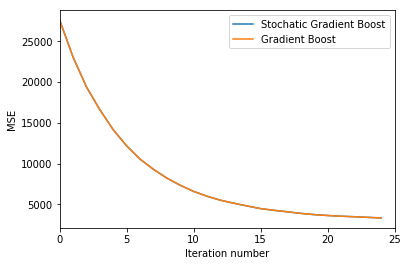

In [75]:
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, model_1.n_trees)
plt.plot(list(range(model_1.n_trees)), model_1.test_errors, label='Stochatic Gradient Boost')
plt.plot(list(range(model_2.n_trees)), model_2.test_errors, label='Gradient Boost')
plt.legend(loc='upper right')
plt.show()

In [76]:
model_1 = MyGradienBoostStochatic(n_trees = 25, max_depth = 1, alpha = 0.1, batch_size = 0.1)
model_1.fit(X_train, X_test, y_train, y_test)
model_2 = MyGradienBoost(n_trees = 25, max_depth = 1, alpha = 0.1)
model_2.fit(X_train, X_test, y_train, y_test)

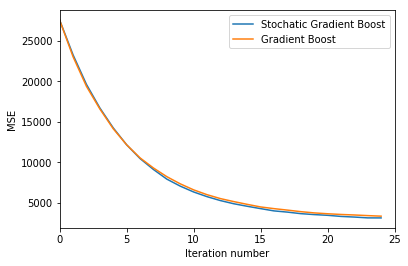

In [77]:
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, model_1.n_trees)
plt.plot(list(range(model_1.n_trees)), model_1.test_errors, label='Stochatic Gradient Boost')
plt.plot(list(range(model_2.n_trees)), model_2.test_errors, label='Gradient Boost')
plt.legend(loc='upper right')
plt.show()